In [1]:
import pandas as pd
import numpy as np
import turicreate as tc

In [2]:
# read the data
df = pd.read_csv("bankdata.csv" , header = 0)

In [3]:
# data transformation and wrangling

df["date"] = pd.to_datetime(df['date'] , format= "%d/%m/%Y")
df["month"] = df["date"].dt.month
df["date"] = df["date"].dt.day
df = df.rename(columns = {'date':'day'})

In [4]:
# how data looks like
df

,day,balance,month
0,1,2000,1
1,2,1300,1
2,3,1300,1
3,4,1300,1
4,5,1280,1
5,6,1250,1
6,7,1250,1
7,8,1250,1
8,9,1220,1
9,10,1220,1


In [5]:
# converting to sframe
data = tc.SFrame(df)

In [6]:
# Make a train-test split
train_data, test_data = data.random_split(0.8)

In [7]:
# train a model
model = tc.regression.create(data, target='balance')

Automatically generating validation set from 5% of the data.

Linear regression:

--------------------------------------------------------

Number of examples          : 232

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 0         | 1        | 1.005267     | 4200.000000        | 3075.000000          | 2044.806623                     | 1928.907722                       |

| 1         | 2        | 1.006418     | 1706.924021        | 1001.591608          | 737.376179                      | 607.372072                        |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

Boosted trees regression:

--------------------------------------------------------

Number of examples          : 232

Number of features          : 2

Number of unpacked features : 2

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 0.006464     | 3349.620361        | 2224.620361          | 1468.173218                     | 1296.138794                       |

| 2         | 0.012076     | 2724.498535        | 1681.516479          | 1060.372559                     | 925.575012                        |

| 3         | 0.017483     | 2229.801270        | 1186.819214          | 770.712769                      | 617.348938                        |

| 4         | 0.023222     | 1801.778809        | 837.680664           | 557.342041                      | 424.825836                        |

| 5         | 0.028311     | 1487.895508        | 614.321533           | 406.859375                      | 308.352020                        |

| 10        | 0.050109     | 706.385010         | 384.703857           | 99.497543                       | 198.106247                        |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

In [8]:
# Save predictions to an SFrame (class and corresponding class-probabilities)
predictions = model.predict(test_data)

# Evaluate the model and save the results into a dictionary
results = model.evaluate(test_data)

In [9]:
# see what is the predicted value vs actual value

pd.DataFrame({"predicted" : predictions , "actual_value" : test_data["balance"]})

,predicted,actual_value
0,1895.852417,2000
1,1260.125122,1300
2,1163.091064,1020
3,762.087158,780
4,762.087158,780
5,700.990295,720
6,486.910919,500
7,1701.351807,1800
8,1585.673218,1720
9,1464.370850,1520


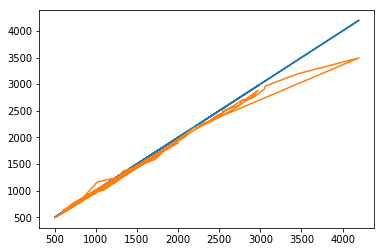

In [12]:
# visualise the data of actual vs 
import matplotlib.pyplot as plt
import numpy as np

x = test_data["balance"]

plt.plot(x, x)
plt.plot(x, predictions)
plt.show()

In [11]:
# save the model to coreml

model.export_coreml('MyModel.mlmodel')